In [1]:
import os, sys
if os.path.exists("./src"):
    directory_to_prepend = os.path.abspath("./src")
else:
    raise RuntimeError("'src' is not in path")

print(f"-> src path found in: '{directory_to_prepend}")

if directory_to_prepend not in sys.path:
    sys.path = [directory_to_prepend] + sys.path

-> src path found in: '/home/gergedan/academy/shnn-repo/src


In [2]:
from joblib import load
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from experiment import SampledExperiment, SampledModels
from model.s_hnn import S_HNN
from model.s_mlp import S_MLP

COLOR_TRUTH = '#000000'
COLOR_ELM = '#05c9ff' # blue
COLOR_USWIM = '#ff0000' # red
COLOR_ASWIM = '#28fa02' # green
COLOR_SWIM = '#ffff00' # yellow

# Configure MPL parameters (taken from https://github.com/jbmouret/matplotlib_for_papers)
golden_ratio = (5**.5 - 1) / 2
params = {
    'figure.figsize': [5, 5*golden_ratio],
    "text.usetex": True,
    "font.family": "serif",
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}

# scaling params
ALPHAS_STR = ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
ALPHAS = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]

def get_experiment_results():    
    error_means = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_lows  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    error_highs = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_means  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_lows   = { "elm": [], "uswim": [], "aswim": [], "swim": [] }
    time_highs  = { "elm": [], "uswim": [], "aswim": [], "swim": [] }

    for n in ALPHAS:
        experiment: SampledExperiment = load(f"experiments/henon-heiles/experiment_alpha_{n}.pkl")
        
        error_means["elm"].append(np.mean(experiment.results.elm_test_H_errors))
        error_lows["elm"].append(np.min(experiment.results.elm_test_H_errors))
        error_highs["elm"].append(np.max(experiment.results.elm_test_H_errors))
        time_means["elm"].append(np.mean(experiment.results.elm_train_times))
        time_lows["elm"].append(np.min(experiment.results.elm_train_times))
        time_highs["elm"].append(np.max(experiment.results.elm_train_times))

        error_means["uswim"].append(np.mean(experiment.results.uswim_test_H_errors))
        error_lows["uswim"].append(np.min(experiment.results.uswim_test_H_errors))
        error_highs["uswim"].append(np.max(experiment.results.uswim_test_H_errors))
        time_means["uswim"].append(np.mean(experiment.results.uswim_train_times))
        time_lows["uswim"].append(np.min(experiment.results.uswim_train_times))
        time_highs["uswim"].append(np.max(experiment.results.uswim_train_times))

        error_means["aswim"].append(np.mean(experiment.results.aswim_test_H_errors))
        error_lows["aswim"].append(np.min(experiment.results.aswim_test_H_errors))
        error_highs["aswim"].append(np.max(experiment.results.aswim_test_H_errors))
        time_means["aswim"].append(np.mean(experiment.results.aswim_train_times))
        time_lows["aswim"].append(np.min(experiment.results.aswim_train_times))
        time_highs["aswim"].append(np.max(experiment.results.aswim_train_times))

        error_means["swim"].append(np.mean(experiment.results.swim_test_H_errors))
        error_lows["swim"].append(np.min(experiment.results.swim_test_H_errors))
        error_highs["swim"].append(np.max(experiment.results.swim_test_H_errors))
        time_means["swim"].append(np.mean(experiment.results.swim_train_times))
        time_lows["swim"].append(np.min(experiment.results.swim_train_times))
        time_highs["swim"].append(np.max(experiment.results.swim_train_times))

    return error_means, error_lows, error_highs, time_means, time_lows, time_highs

In [3]:
# overview of the domain params and model params of the Lotka-Volterra experiments
experiment: SampledExperiment = load("experiments/henon-heiles/experiment_alpha_1.0.pkl")
print("Henon-Heiles experiment")
print("-----------------------------------------")
print("DOMAIN_PARAMS:", experiment.domain_params)
print("MODEL_PARAMS:", experiment.model_params)
print("-----------------------------------------")

Henon-Heiles experiment
-----------------------------------------
DOMAIN_PARAMS: SampledDomainParams(target=<hamiltonian.henon_heiles.HenonHeiles object at 0x75ead4e990a0>, q_lims=[[-5.0, 5.0], [-5.0, 5.0]], p_lims=[[-5.0, 5.0], [-5.0, 5.0]], train_size=20000, test_size=20000, repeat=10, start_data_random_seed=3943)
MODEL_PARAMS: SampledModelParams(activation=<ActivationType.TANH: 'tanh'>, network_width=5000, resample_duplicates=True, rcond=1e-13, elm_bias_start=-5.0, elm_bias_end=5.0, start_model_random_seed=992472)
-----------------------------------------


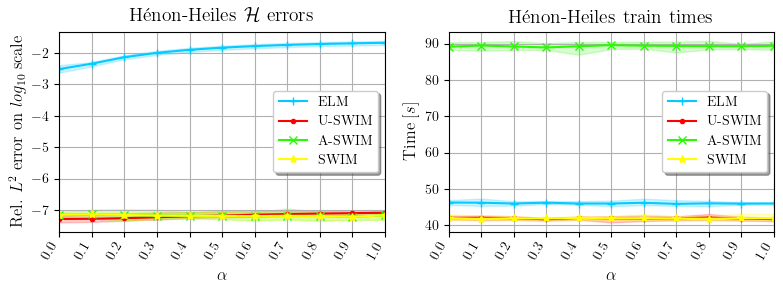

In [4]:
golden_ratio = (5**.5 - 1) / 2
mpl.rcParams.update(params)
%matplotlib inline

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(8,5*golden_ratio), dpi=100)

# left plot (error)
error_means, error_lows, error_highs, time_means, time_lows, time_highs = get_experiment_results()

ax1.set_title(r"Hénon-Heiles $\mathcal{H}$ errors")
ax1.plot(ALPHAS, np.log10(error_means["elm"]), c=COLOR_ELM, marker="+") # light blue
ax1.plot(ALPHAS, np.log10(error_means["uswim"]), c=COLOR_USWIM, marker=".") # light red
ax1.plot(ALPHAS, np.log10(error_means["aswim"]), c=COLOR_ASWIM, marker="x") # light green
ax1.plot(ALPHAS, np.log10(error_means["swim"]), c=COLOR_SWIM, marker="*") # light yellow
ax1.fill_between(ALPHAS, np.log10(error_lows["elm"]), np.log10(error_highs["elm"]), color=COLOR_ELM, alpha=0.2)
ax1.fill_between(ALPHAS, np.log10(error_lows["uswim"]), np.log10(error_highs["uswim"]), color=COLOR_USWIM, alpha=0.2)
ax1.fill_between(ALPHAS, np.log10(error_lows["aswim"]), np.log10(error_highs["aswim"]), color=COLOR_ASWIM, alpha=0.2)
ax1.fill_between(ALPHAS, np.log10(error_lows["swim"]), np.log10(error_highs["swim"]), color=COLOR_SWIM, alpha=0.2)
ax1.set_xticks(ALPHAS)
ax1.set_xticklabels(ALPHAS, rotation=60, ha="right")
ax1.set_xlim([np.min(ALPHAS), np.max(ALPHAS)])
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel(r"Rel. $L^{2}$ error on $log_{10}$ scale")
ax1.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax1.grid()

# right plot (train times)

ax2.set_title(r"Hénon-Heiles train times")
ax2.plot(ALPHAS, time_means["elm"], c=COLOR_ELM, marker="+") # light blue
ax2.plot(ALPHAS, time_means["uswim"], c=COLOR_USWIM, marker=".") # light red
ax2.plot(ALPHAS, time_means["aswim"], c=COLOR_ASWIM, marker="x") # light green
ax2.plot(ALPHAS, time_means["swim"], c=COLOR_SWIM, marker="*") # light yellow
ax2.fill_between(ALPHAS, time_lows["elm"], time_highs["elm"], color=COLOR_ELM, alpha=0.2)
ax2.fill_between(ALPHAS, time_lows["uswim"], time_highs["uswim"], color=COLOR_USWIM, alpha=0.2)
ax2.fill_between(ALPHAS, time_lows["aswim"], time_highs["aswim"], color=COLOR_ASWIM, alpha=0.2)
ax2.fill_between(ALPHAS, time_lows["swim"], time_highs["swim"], color=COLOR_SWIM, alpha=0.2)
ax2.set_xticks(ALPHAS)
ax2.set_xticklabels(ALPHAS, rotation=60, ha="right")
ax2.set_xlim([np.min(ALPHAS), np.max(ALPHAS)])
ax2.set_xlabel(r"$\alpha$")
ax2.set_ylabel(r"Time $[s]$")
ax2.legend(["ELM", "U-SWIM", "A-SWIM", "SWIM"], shadow=True, loc="best")
ax2.grid()

fig.tight_layout()
fig.savefig("plots/henon-heiles-fig.pdf")

In [5]:
# Analyze the error at alpha=1
error_means, _, _, time_means, _, _ = get_experiment_results()
print("Errors at alpha=1")
print(f"ELM    : {error_means["elm"][-1]   : .2E}") # alpha=1 is at index -1
print(f"U-SWIM : {error_means["uswim"][-1] : .2E}")
print(f"A-SWIM : {error_means["aswim"][-1] : .2E}")
print(f"SWIM   : {error_means["swim"][-1]  : .2E}")
print("----------------")
print("Mean train times at alpha=1")
print(f"ELM    : {time_means["elm"][-1]   : .1f}") # alpha=1 is at index -1
print(f"U-SWIM : {time_means["uswim"][-1] : .1f}")
print(f"A-SWIM : {time_means["aswim"][-1] : .1f}")
print(f"SWIM   : {time_means["swim"][-1]  : .1f}")

Errors at alpha=1
ELM    :  2.07E-02
U-SWIM :  8.22E-08
A-SWIM :  6.80E-08
SWIM   :  6.80E-08
----------------
Mean train times at alpha=1
ELM    :  46.0
U-SWIM :  41.7
A-SWIM :  89.4
SWIM   :  41.9


In [6]:
# Train a traditional network for comparison for the larger domain

from data import get_train_test_set
from hamiltonian.henon_heiles import HenonHeiles
from activation import ActivationType
from model.hnn import HNN
from trainer.sampler import Sampler
from trainer.traditional_trainer import TraditionalTrainer
from model.sampled_network_type import SampledNetworkType
from trainer.param_sampler import ParameterSampler
from util.device_type import DeviceType
from time import time 
import torch

experiment: SampledExperiment = load(f"experiments/henon-heiles/experiment_alpha_1.0.pkl")
domain_params = experiment.domain_params
model_params = experiment.model_params

henon_heiles = HenonHeiles(alpha=1.0)

torch.set_default_dtype(torch.float64)

print("-> setting up domain")
train_set, test_set = get_train_test_set(2, henon_heiles, domain_params.train_size, domain_params.test_size, domain_params.q_lims, domain_params.p_lims, rng = np.random.default_rng(domain_params.start_data_random_seed))

( ((train_inputs, _), train_dt_truths, train_H_truths, train_H_grad_truths), (train_x_0, train_x_0_H_truth) ) = train_set
( test_inputs, test_dt_truths, test_H_truths, test_H_grad_truths ) = test_set

print("-> training a traditional HNN")
hnn = HNN(input_dim=4, hidden_dim=model_params.network_width, activation=ActivationType.TANH, random_seed=model_params.start_model_random_seed)

total_steps = 180000
batch_size = 2048
learning_rate = 1e-04
weight_decay = 1e-13

traditional_trainer = TraditionalTrainer(total_steps, batch_size, learning_rate, weight_decay, DeviceType.GPU)

time_begin = time()
train_losses = traditional_trainer.train(hnn, train_inputs, train_dt_truths, train_x_0, train_x_0_H_truth, DeviceType.GPU)
time_end = time()

time_hnn = time_end - time_begin 
error_hnn = hnn.evaluate_H(test_inputs, test_H_truths); assert isinstance(error_hnn, float)

print(f"HNN error        : {error_hnn : .2E}")
print(f"HNN train time   : {time_hnn : .1f}")

-> setting up domain
-> training a traditional HNN
Step No. : Loss (Squared L2 Error)
-> Loss at step 0	:	104.52862147335276
-> Loss at step 1000	:	23.28030847890558
-> Loss at step 2000	:	13.417828071123186
-> Loss at step 3000	:	6.689170626084588
-> Loss at step 4000	:	2.863741975864974
-> Loss at step 5000	:	1.3666512096803278
-> Loss at step 6000	:	0.8617289160820223
-> Loss at step 7000	:	0.5509454010625883
-> Loss at step 8000	:	0.3747236318375684
-> Loss at step 9000	:	0.1894011484116351
-> Loss at step 10000	:	0.11864987234248997
-> Loss at step 11000	:	0.08866484248292011
-> Loss at step 12000	:	0.06737690230733154
-> Loss at step 13000	:	0.060679416811254154
-> Loss at step 14000	:	0.040093465888782535
-> Loss at step 15000	:	0.02660522266138571
-> Loss at step 16000	:	0.022441572734029483
-> Loss at step 17000	:	0.016905523800704793
-> Loss at step 18000	:	0.01564141446233924
-> Loss at step 19000	:	0.011017771786833403
-> Loss at step 20000	:	0.0075744804857584775
-> Loss a

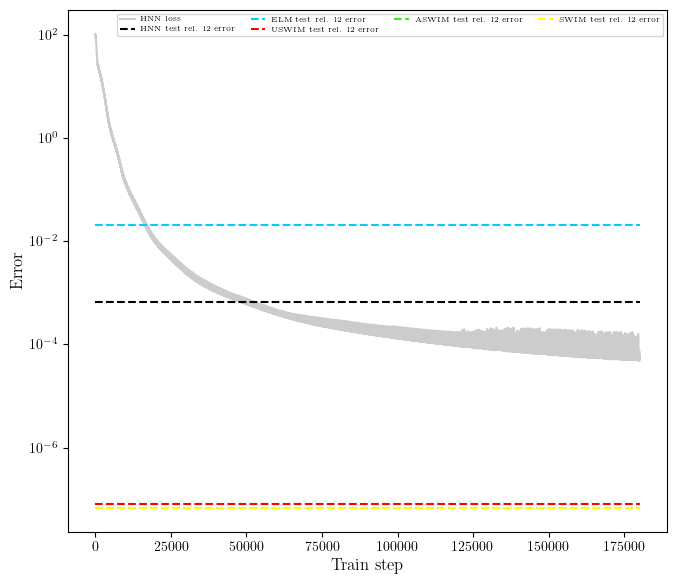

In [55]:
from scipy.ndimage import gaussian_filter

steps = range(1, total_steps + 1)
elm_error = error_means['elm'][-1]
uswim_error = error_means['uswim'][-1]
aswim_error = error_means['aswim'][-1]
swim_error = error_means['swim'][-1]

fig = plt.figure(figsize=[7, 6], dpi=100)
plt.plot(steps, gaussian_filter(train_losses, 2), color='black', label='HNN loss', alpha=0.2)
plt.plot([1, total_steps], [error_hnn]*2, color='black', linestyle='--', label='HNN test rel. l2 error')
plt.plot([1, total_steps], [elm_error]*2, color=COLOR_ELM, linestyle='--', label='ELM test rel. l2 error')
plt.plot([1, total_steps], [uswim_error]*2, color=COLOR_USWIM, linestyle='--', label='USWIM test rel. l2 error')
plt.plot([1, total_steps], [aswim_error]*2, color=COLOR_ASWIM, linestyle='--', label='ASWIM test rel. l2 error')
plt.plot([1, total_steps], [swim_error]*2, color=COLOR_SWIM, linestyle='--', label='SWIM test rel. l2 error')


plt.ylabel('Error') ; plt.xlabel('Train step') ; plt.yscale('log'); plt.legend(ncol=4, fontsize=5.25); plt.tight_layout()